In [242]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

Open file and process data into correct type:

In [243]:
raw_data = open("entropy_data.txt","r")
raw_data = raw_data.read().split(",")
# there is a blank value at the end therefore remove it
raw_data.pop()

processed_data = []
for i in range(len(raw_data)):
    processed_data.append(float(raw_data[i]))
processed_data

[-0.1407804608890867,
 10.0,
 -0.15296821255066326,
 13.245000000000001,
 -0.16500200979158125,
 16.5,
 -0.17751194155861785,
 19.755000000000003,
 -0.1871311041468937,
 23.0,
 -0.19139903269586442,
 26.244999999999997,
 -0.195757009635811,
 29.5,
 -0.1977719010294426,
 32.754999999999995,
 -0.20108000143863716,
 36.0,
 -0.20367186112461536,
 39.245000000000005,
 -0.2039759295129189,
 42.5,
 -0.20515997945741837,
 45.754999999999995,
 -0.20660482317791765,
 49.0,
 -0.2075458306911552,
 52.245000000000005,
 -0.20871933234872936,
 55.5,
 -0.20904342693542816,
 58.754999999999995,
 -0.20962533551330143,
 62.0,
 -0.2114076867626405,
 65.245,
 -0.2118970311744784,
 68.5,
 -0.21222463029004726,
 71.755]

Split data into 2 separate lists:

In [244]:
distance, entropy = [], []
for i in range(len(processed_data)):
    if i == 0 or i%2 == 0:
        entropy.append(processed_data[i])
    else:
        distance.append(processed_data[i])

Plot entropy against distance:

Text(0, 0.5, 'Entropy')

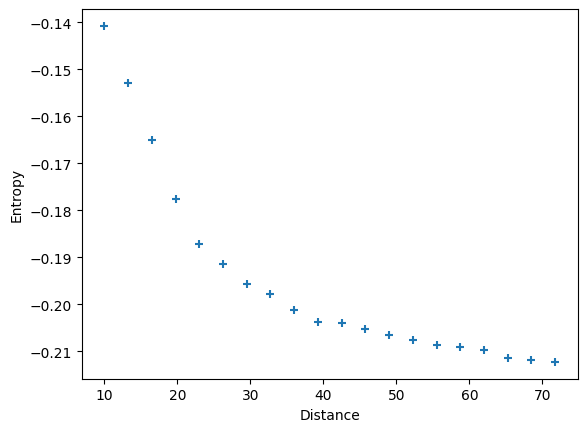

In [245]:
plt.scatter(distance,entropy,marker='+')
plt.xlabel("Distance")
plt.ylabel("Entropy")


Plot gradient against distance:

In [246]:
x_values,y_values = [],[]
for i in range(0,len(processed_data),2):
    x_values.append(processed_data[i+1])
    y_values.append(processed_data[i])

In [247]:
p = np.polyfit(x_values,y_values,3)
p

array([-8.02147971e-07,  1.27109149e-04, -6.79256621e-03, -8.50026054e-02])

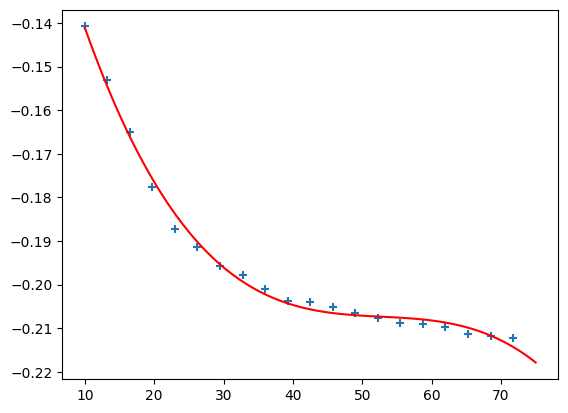

In [248]:
x = np.linspace(10,75,100)
y = (p[0] * x**3) + (p[1] * x**2) + (p[2] * x) + p[3]

plt.scatter(distance,entropy,marker='+')
plt.plot(x,y,"red")

In [249]:
def f(x, a, b, c):
    return (a*(x**b)) + c

p2 = scipy.optimize.curve_fit(f, xdata=x_values,ydata=y_values, p0=(0,-1,2))
p2 = p2[0]
p2

array([ 0.68287664, -0.86604068, -0.23006876])

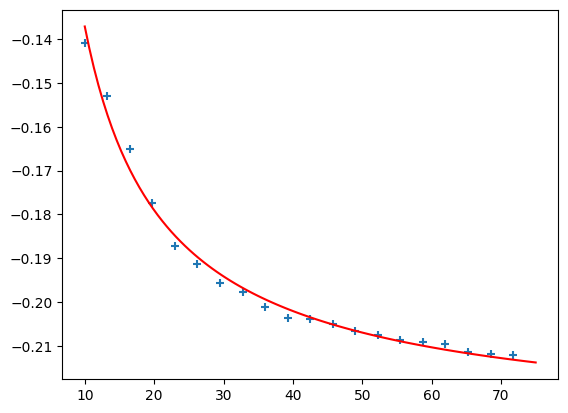

In [250]:
y2 = (p2[0] * (x**p2[1])) + p2[2]

plt.scatter(distance,entropy,marker='+')
plt.plot(x,y2,"red")